<a href="https://colab.research.google.com/github/sehan25/ESAA-2022-1/blob/main/Assignment/0523_Python_Machine_Learning_p303-p310.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**04. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측**
---

- 사이킷런의 linear_models 모듈은 매우 다양한 종류의 선형 기반 회귀를 클래스로 구현해 제공한다.

> ### LinearRegression 클래스 - Ordinary Least Square
> ---

LinearRegression 클래스: 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스

- `fit()` 메서드로 X, y 배열을 입력 받으면 회귀 계수(Coefficients)인 W를 `coef_` 속성에 저장한다.

```
class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=-1)
```
- 입력 파라미터
    - `fit_intercept`: 불린 값으로, 디폴트는 True. intercept(절편) 값을 계산할 것인지 말지를 지정. 만일 False로 지정하면 intercept가 사용되지 않고 0으로 지정됨
    - `normalize`: 불린 값으로 디폴트는 False. `fit_intercept`가 False인 경우에는 이 파라미터가 무시됨. 만일 True이면 회귀를 수행하기 전에 입력 데이터 세트를 정규화함
- 속성
    - `coef_`: `fit()` 메서드를 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성. Shape는 (Target 값 개수, 피처 개수)
    - `intercept`_: intercept 값
- Ordinary Least Squares 기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받는다. 피처 간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해진다. - 다중공선성(multi-collinearity) 문제
    - 일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용함
    - 매우 많은 피처가 다중 공선성 문제를 가지고 있다면 PCA를 통해 차원 축소를 수행하는 것도 고려해볼 수 있음


> 회귀 평가 지표
> ---

- 회귀의 평가를 위한 지표는 실제 값과 회귀 예측값의 차이 값을 기반으로 한 지표가 중심이다.
- 오류의 절댓값 평균이나 제곱, 또는 제곱한 뒤 다시 루트를 씌운 평균값을 구한다.
- 회귀의 성능을 평가하는 지표

|평가 지표|설명|수식|
|---|---|---|
|MAE|Mean Absolute Error(MAE)이며 실제 값과 예측값의 차이를 절댓값으로 변환해 평균한 것|$$MAE = \frac{1}{n}\sum_{i=1}^{n}\left|Y_{i}-\hat{Y_{i}} \right|$$|
|MSE|Mean Squared Error(MSE)이며 실제 값과 예측값의 차이를 제곱해 평균한 것|$$MSE=\frac{1}{n}\sum_{i=1}^{n}(Y_{i}-\hat{Y_{i}})^2$$|
|RMSE|MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 루트를 씌운 것|$$RMSE=\sqrt{\frac{1}{n}\sum_{i=1}^{n}(Y_{i}-\hat{Y_{i}})^2}$$|
|$$R^2$$|분산 기반으로 예측 성능을 평가함. 실제 값의 분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울수록 예측 정확도가 높음|$$R^2=\frac{예측값 Variance}{실제값 Variance}$$|
|MLSE|MSE나 RMSE에 로그를 적용한 것| |

-   - 사이킷런은 아쉽게도 RMSE를 제공하지 않음. RMSE를 구하기 위해서는 MSE에 제곱근을 씌워서 계산하는 함수를 직접 만들어야 함.
-  각 평가 방법에 대한 사이킷런의 API 및 cross_val_score나 GridSearchCV에서 평가 시 사용되는 scoring 파라미터의 적용 값

|평가 방법|사이킷런 평가 지표 API|Scoring 함수 적용 값|
|---|---|---|
|MAE|metrics.mean_absolute_error|'neg_mean_absolute_error'|
|MSE|metrics.mean_squared_error|'neg_mean_squared_error'|
|R^2|metrics.r2_score|'r2'|

- * cross_val_score, GridSearchCV와 같은 Scoring 함수에 회귀 평가 지표를 적용할 때 한 가지 유의할 점이 있음
    - Scoring 함수에 'neg_mean_absolute_error'를 적용해 음수값을 반환하는 이유는 사이킷런의 Scoring 함수가 score값이 클수록 좋은 평가 결과를 자동 평가히기 때문임. 그런데 실제 값과 예측값의 오류 차이를 기반으로 하는 회귀 평가 지표의 경우 값이 커지면 오히려 나쁜 모델이라는 의미이므로 이를 사이킷런의 Scoring 함수에 일반적으로 반영하려면 보정이 필요
    - 따라서 -1을 원래의 평가 지표 값에 곱해서 음수(Neagative)를 만들어 작은 오류 값이 더 큰 숫자로 인식하게 함. Scoring 함수의 scoring 파라미터 값 'neg_mean_absolute_error'가 의미하는 것은 -1 * metrics.mean_absolute_error()이니 주의가 필요

> LinearRegression을 이용해 보스턴 주택 가격 회귀 구현
> ---

*LinearRegression 클래스를 이용해 선형 회귀 모델을 만들어 보기*
- 사이킷런에 내장된 데이터 세트인 보스턴 주택 가격 데이터를 이용한다.
    - CRIM: 지역별 범죄 발생률
    - ZN: 25,000평방피트를 초과하는 거주 지역의 비율
    - INDUS: 비상업 지역 넓이 비율
    - CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
    - NOX: 일산화질소 농도
    - RM: 거주할 수 있는 방 개수
    - AGE: 1940년 이전에 건축된 소유 주택의 비율
    - DIS: 5개 주요 고용센터까지의 가중 거리
    - RAD: 고속도로 접근 용이도
    - TAX: 10,000달러당 재산세율
    - PTRATIO: 지역의 교사와 학생 수 비율
    - B: 지역의 흑인 거주 비율
    - LSTAT: 하위 계층의 비율
    - MEDV: 본인 소유의 주택 가격(중앙값)
- 사이킷런은 보스턴 주택 가격 데이터 세트를 `load_boston()`을 통해 제공
    - 해당 데이터 세트를 로드하고 DataFrame으로 변경

In [1]:
## 데이터 세트 로드

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이터 세트 로드
boston = load_boston()

# boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

# boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 칼럼으로 DataFrame에 추가함
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기: ', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기:  (506, 14)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- 각 칼럼의 회귀 결과에 미치는 영향이 어느 정도인지 시각화
    - 총 8개의 칼럼에 대해 값이 증가할수록 PRICE 값이 어떻게 변하는지 확인
    - 시본(Seaborn)의 `regplot()` API는 X,Y축 값의 산점도와 함께 선형 회귀 직선을 그려줌
    - `matplotlib.subplots()`를 이용해 각 ax마다 칼럼과 PRICE의 관계를 표현
        - 여러 개의 그래프를 한번에 표현하기 위해 자주 사용
        - ncols는 열 방향으로 위치할 그래프의 개수, nrows는 행 방향으로 위치할 그래프의 개수

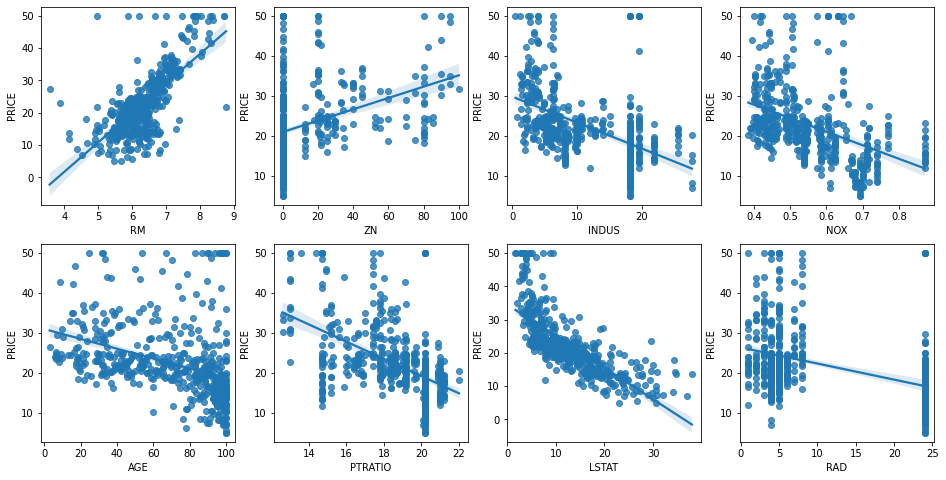

In [2]:
## 각 칼럼의 회귀 결과에 미치는 영향이 어느 정도인지 시각화

# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4*2개의 ax를 가짐
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

    다른 칼럼보다 RM과 LSTAT의 PRICE 영향도가 가장 두드러지게 나타남. RM(방 개수)은 양 방 향의 선형성(Positive Linearity)이 가장 큼. 즉, 방의 크기가 클수록 가격이 증가하는 모습을 확연히 보여줍니다.
    LSTAT(하위 계층의 비율)는 음 방향의 선형성(Negative Linearity)이 가장 큼. LSTAT이 적을 수록 PRICE가 증가하는 모습이 확연히 나타남

- LinearRegression 클래스를 이용해 보스턴 주택 가격의 회귀 모델을 만듦
    - `train_test_split()`을 이용해 학습과 테스트 데이터 세트를 분리해 학습과 예측을 수행
    - metrics 모듈의 `mean_squared_error()`와 `r2_score()` API를 이용해 MSE와 R2 Score를 측정

In [3]:
## LinearRegression 클래스를 이용해 보스턴 주택 가격의 회귀 모델 생성

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3,
                                                    random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE: {0:.3f}, RMSE: {1:.3F}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 17.297, RMSE: 4.159
Variance score: 0.757


- LinearRegression으로 생성한 주택가격 모델의 intercept(절편)과 coefficients(회귀 계수) 값 보기
    - 절편은 LinearRegression 객체의 `intercept_` 속성에, 회귀 계수는 `coef_` 속성에 값이 저장

In [4]:
## 모델의 intercept(절편)과 coefficients(회귀 계수) 값 출력

print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164755
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


- `coef_`속성은 회귀 계수 값만 가지고 있으므로 이를 피처별 회귀 계수 값으로 다시 매핑하고, 높은 값 순으로 출력
    - 판다스 Series의 `sort_values()` 함수 이용

In [5]:
## 피처별 회귀 계수 값으로 매핑하고 높은 값 순으로 출력

# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

    RM이 양의 값으로 회귀 계수가 가장 크며, NOX 피처의 회귀 계수 - 값이 너무 커 보임

- 5개의 폴드 세트에서 `cross_val score()`를 이용해 교차 검증으로 MSE와 RMSE를 측정
    - 사이킷런은 `cross_val score()`를 이용하는데 RMSE를 제공하지 않으므로 MSE 수치 결과를 RMSE로 변환해야 함
    - 사이킷런의 metric 평가 기준에 MSE를 부합시키기 위해서 `scoring='neg_mean squared_ error'`로 사이킷런의 Scoring 함수를 호출하면 모델에서 계산된 MSE 값에 -1을 곱해서 반환함. 따라서 `cross_val_score()`에서 반화뇐 값에 다시 -1을 곱해야 양의 값인 원래 모델에서 계산된 MSE 값이 됨. 이렇게 다시 변환된 MSE 값에 넘파이의 `sqrt()` 함수를 적용해 RMSE 구하기 가능


In [6]:
## 5개의 폴드 세트에서 cross_val score()를 이용해 교차 검증으로 MSE와 RMSE 측정

from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE:, {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE:, 5.829
